# Acknowledgements

Dataset ini diambil dari [kaggle.com](https://www.kaggle.com/datasets/sudalairajkumar/daily-temperature-of-major-cities)

### Downloading Dataset

In [ ]:
# from google.colab import drive

# drive.mount('/content/drive')

In [ ]:
# !mkdir ~/.kaggle
# !cp /content/drive/MyDrive/kaggle.json ~/.kaggle
# !chmod 600 ~/.kaggle/kaggle.json

In [ ]:
# !kaggle datasets download -d sudalairajkumar/daily-temperature-of-major-cities

In [ ]:
# !unzip daily-temperature-of-major-cities.zip

# Data Loading

In [ ]:
import pandas as pd
import numpy as np

path = 'city_temperature.csv'
df = pd.read_csv(path, low_memory=False)
df.head()

,Region,Country,State,City,Month,Day,Year,AvgTemperature
0,Africa,Algeria,NaN,Algiers,1,1,1995,64.2
1,Africa,Algeria,NaN,Algiers,1,2,1995,49.4
2,Africa,Algeria,NaN,Algiers,1,3,1995,48.8
3,Africa,Algeria,NaN,Algiers,1,4,1995,46.4
4,Africa,Algeria,NaN,Algiers,1,5,1995,47.9


# Exploratory Data Analysis

Dataset ini merupakan suhu rata-rata setiap hari pada setiap wilayah bagian bumi.

Dataset detail :
* Region : wilayah bumi bagian dari suhu yang diukur
* Country : negara dari suhu yang diukur
* State : negara dari suhu yang diukur
* City : kota dari suhu yang diukur
* Month : bulan diukurnya suhu
* Day : tanggal diukurnya suhu
* Year : tahun diukurnya suhu
* AvgTemperature : suhu rata-rata yang diukur

In [ ]:
print(f'The dataframe has {df.shape[0]} records and {df.shape[1]} columns')

The dataframe has 2906327 records and 8 columns


In [ ]:
print(f'Total missing values in the dataset {df.isna().sum().sum()} records')

Total missing values in the dataset 1450990 records


In [ ]:
print('Missing value in the dataframe')
print(df.isna().sum())

Missing value in the dataframe
Region                  0
Country                 0
State             1450990
City                    0
Month                   0
Day                     0
Year                    0
AvgTemperature          0
dtype: int64


Dari sini kita bisa lihat bahwa missing value dari dataset ini sangatlah banyak namun kita tidak akan menggunakan State sehingga kita dapat menghapus kolom ini nanti

In [ ]:
print('Unique values in every column')
print('-' * 25)
for i in df.columns:
  print(f'{i} = {len(set(df[i]))}')

Unique values in every column
-------------------------
Region = 7
Country = 125
State = 53
City = 321
Month = 12
Day = 32
Year = 28
AvgTemperature = 1517


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2906327 entries, 0 to 2906326
Data columns (total 8 columns):
 #   Column          Dtype  
---  ------          -----  
 0   Region          object 
 1   Country         object 
 2   State           object 
 3   City            object 
 4   Month           int64  
 5   Day             int64  
 6   Year            int64  
 7   AvgTemperature  float64
dtypes: float64(1), int64(3), object(4)
memory usage: 177.4+ MB


In [ ]:
df.describe()

,Month,Day,Year,AvgTemperature
count,2.906327e+06,2.906327e+06,2.906327e+06,2.906327e+06
mean,6.469163e+00,1.571682e+01,2.006624e+03,5.600492e+01
std,3.456489e+00,8.800534e+00,2.338226e+01,3.212359e+01
min,1.000000e+00,0.000000e+00,2.000000e+02,-9.900000e+01
25%,3.000000e+00,8.000000e+00,2.001000e+03,4.580000e+01
50%,6.000000e+00,1.600000e+01,2.007000e+03,6.250000e+01
75%,9.000000e+00,2.300000e+01,2.013000e+03,7.550000e+01
max,1.200000e+01,3.100000e+01,2.020000e+03,1.100000e+02


Hapus kolom yang relevan

In [ ]:
col_to_drop = ['Country', 'State', 'City']
new_df = df.drop(col_to_drop, axis=1)
new_df.head()

,Region,Month,Day,Year,AvgTemperature
0,Africa,1,1,1995,64.2
1,Africa,1,2,1995,49.4
2,Africa,1,3,1995,48.8
3,Africa,1,4,1995,46.4
4,Africa,1,5,1995,47.9


Menggabungkan kolom Month, Day, dan Year menjadi satu kesatuan agar menjadi tanggal yang valid

In [ ]:
new_df['Date'] = new_df['Day'].astype(str) + '-' + new_df['Month'].astype(str) + '-' + new_df['Year'].astype(str)
new_df.head()

,Region,Month,Day,Year,AvgTemperature,Date
0,Africa,1,1,1995,64.2,1-1-1995
1,Africa,1,2,1995,49.4,2-1-1995
2,Africa,1,3,1995,48.8,3-1-1995
3,Africa,1,4,1995,46.4,4-1-1995
4,Africa,1,5,1995,47.9,5-1-1995


Melihat distribusi data berdasarkan Region

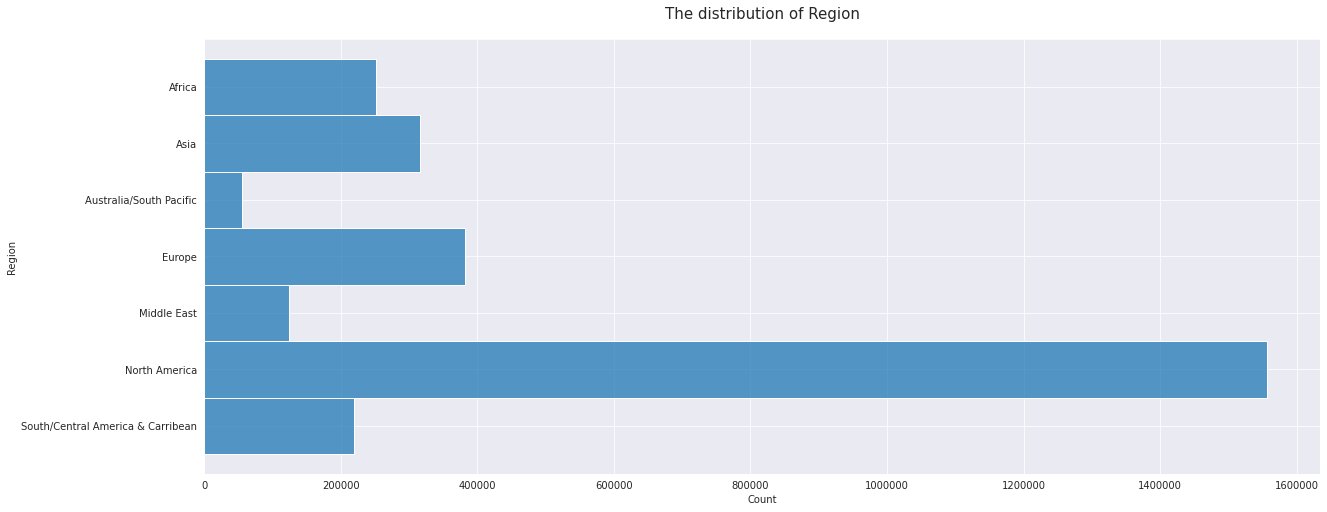

In [ ]:
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
sns.set_style('darkgrid')

plt.figure(figsize=(20,8))
plt.ticklabel_format(style='plain', axis='x')
plt.title('The distribution of Region', fontsize=15, pad=20)
sns.histplot(y='Region', data=new_df)

### Plot every region average temperature by month and year

Dari data tersebut dapat kita simpulkan adalah data terbanyak datang dari region North America dan data paling sedikit datang dari Australia. Lalu kita akan lihat perubahan suhu rata-rata dari masing-masing region

In [ ]:
africa_df = new_df[new_df['Region'] == 'Africa']
asia_df = new_df[new_df['Region'] == 'Asia']
ausie_df = new_df[new_df['Region'] == 'Australia/South Pacific']
europe_df = new_df[new_df['Region'] == 'Europe']
middle_east_df = new_df[new_df['Region'] == 'Middle East']
north_america_df = new_df[new_df['Region'] == 'North America']
carribean_df = new_df[new_df['Region'] == 'South/Central America & Carribean']

##### Region Africa

Dapat disimpulkan suhu rata-rata di Africa mengalami penurunan setiap bulan namun mengalami kenaikan setiap tahun.

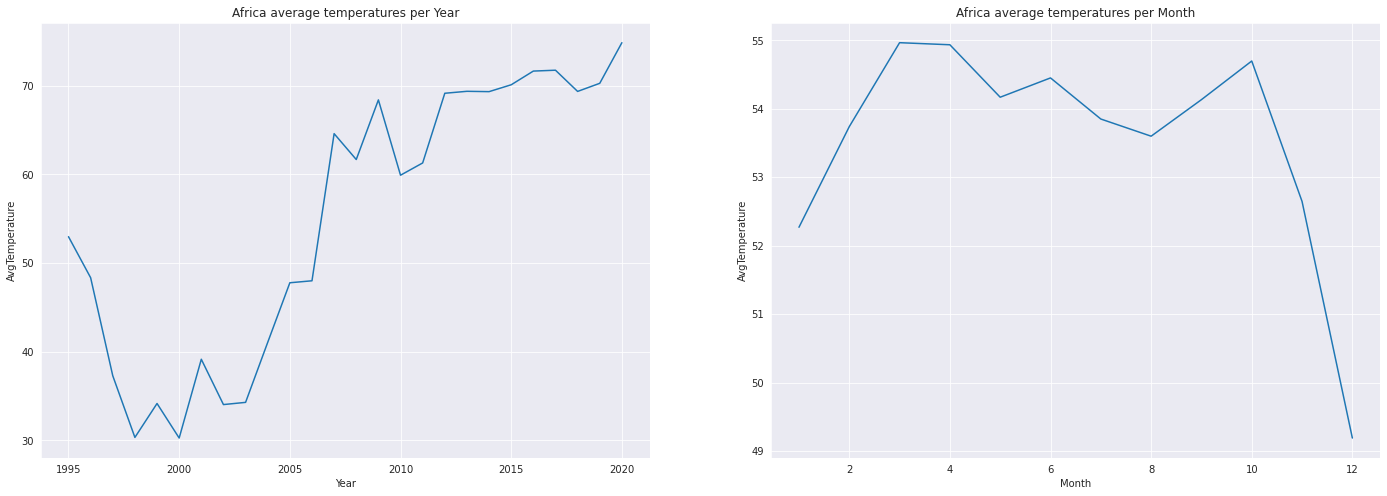

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(24,8))
africa_by_year = africa_df.groupby('Year')['AvgTemperature'].agg(np.mean)
africa_by_month = africa_df.groupby('Month')['AvgTemperature'].agg(np.mean)

# membuang tahun yang tidak valid
africa_by_year = africa_by_year.iloc[1:]

ax[0].title.set_text('Africa average temperatures per Year')
ax[1].title.set_text('Africa average temperatures per Month')
sns.lineplot(data=africa_by_year, ax=ax[0])
sns.lineplot(data=africa_by_month, ax=ax[1])

In [ ]:
africa_min_year = 'Suhu terendah di Africa pada tahun ' + africa_by_year[africa_by_year == africa_by_year.min()].index[0].astype(str) + ' dengan suhu ' + np.round(africa_by_year.min(), 2).astype(str) + ' C'
africa_max_year = 'Suhu tertinggi di Africa pada tahun ' + africa_by_year[africa_by_year == africa_by_year.max()].index[0].astype(str) + ' dengan suhu ' + np.round(africa_by_year.max(), 2).astype(str) + ' C'
africa_min_month = 'Suhu terendah di Africa pada bulan ' + africa_by_month[africa_by_month == africa_by_month.min()].index[0].astype(str) + ' dengan suhu ' + np.round(africa_by_month.min(), 2).astype(str) + ' C'
africa_max_month = 'Suhu tertinggi di Africa pada bulan ' + africa_by_month[africa_by_month == africa_by_month.max()].index[0].astype(str) + ' dengan suhu ' + np.round(africa_by_month.max(), 2).astype(str) + ' C'

In [ ]:
print(africa_min_year)
print(africa_max_year)
print(africa_min_month)
print(africa_max_month)

Suhu terendah di Africa pada tahun 2000 dengan suhu 30.26 C
Suhu tertinggi di Africa pada tahun 2020 dengan suhu 74.87 C
Suhu terendah di Africa pada bulan 12 dengan suhu 49.19 C
Suhu tertinggi di Africa pada bulan 3 dengan suhu 54.96 C


##### Region Asia

Dapat disimpulkan bahwa suhu rata-rata di Asia per tahun dan per bulan kurang lebih sama, yaitu mengalami kenaikan terlebih dulu lalu mengalami penurunan signifikan.

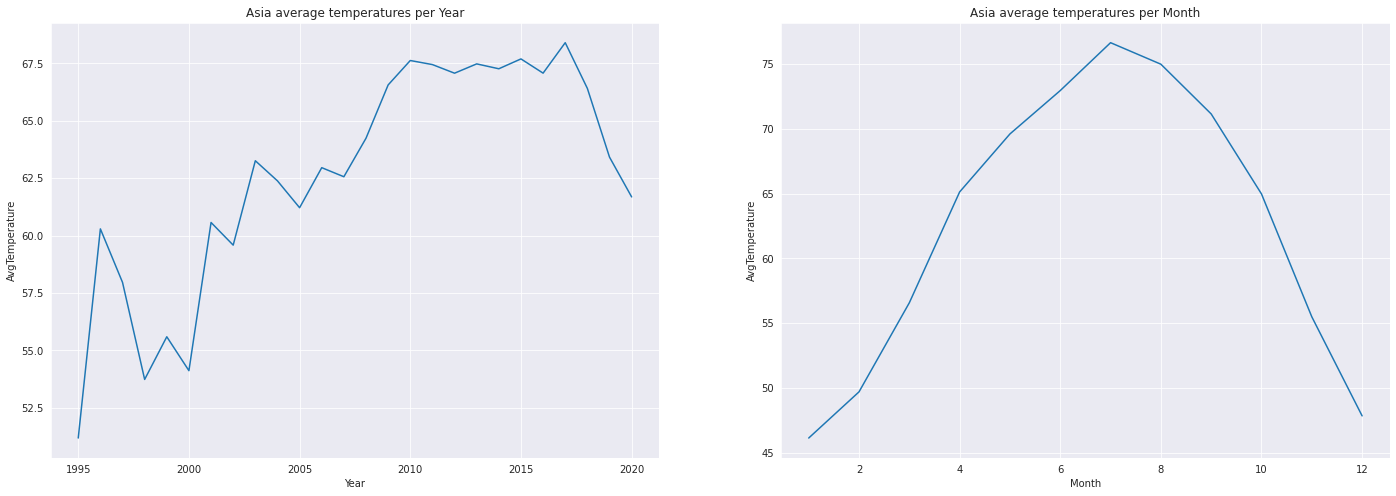

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(24,8))
asia_by_year = asia_df.groupby('Year')['AvgTemperature'].agg(np.mean)
asia_by_month = asia_df.groupby('Month')['AvgTemperature'].agg(np.mean)

ax[0].title.set_text('Asia average temperatures per Year')
ax[1].title.set_text('Asia average temperatures per Month')
sns.lineplot(data=asia_by_year, ax=ax[0])
sns.lineplot(data=asia_by_month, ax=ax[1])

In [ ]:
asia_min_year = 'Suhu terendah di Asia pada tahun ' + asia_by_year[asia_by_year == asia_by_year.min()].index[0].astype(str) + ' dengan suhu ' + np.round(asia_by_year.min(), 2).astype(str) + ' C'
asia_max_year = 'Suhu tertinggi di Asia pada tahun ' + asia_by_year[asia_by_year == asia_by_year.max()].index[0].astype(str) + ' dengan suhu ' + np.round(asia_by_year.max(), 2).astype(str) + ' C'
asia_min_month = 'Suhu terendah di Asia pada bulan ' + asia_by_month[asia_by_month == asia_by_month.min()].index[0].astype(str) + ' dengan suhu ' + np.round(asia_by_month.min(), 2).astype(str) + ' C'
asia_max_month = 'Suhu tertinggi di Asia pada bulan ' + asia_by_month[asia_by_month == asia_by_month.max()].index[0].astype(str) + ' dengan suhu ' + np.round(asia_by_month.max(), 2).astype(str) + ' C'

In [ ]:
print(asia_min_year)
print(asia_max_year)
print(asia_min_month)
print(asia_max_month)

Suhu terendah di Asia pada tahun 1995 dengan suhu 51.18 C
Suhu tertinggi di Asia pada tahun 2017 dengan suhu 68.4 C
Suhu terendah di Asia pada bulan 1 dengan suhu 46.13 C
Suhu tertinggi di Asia pada bulan 7 dengan suhu 76.66 C


##### Region Australia/South Pacific

Dapat disimpulkan bahwa suhu rata-rata di Australia per tahun mengalami perubahan dengan stabil kecuali pada 1998 terlihat suhu turun dengan drastis. Dan mengalami penurunan perlahan setiap bulan lalu mengalami peningkatan kembali

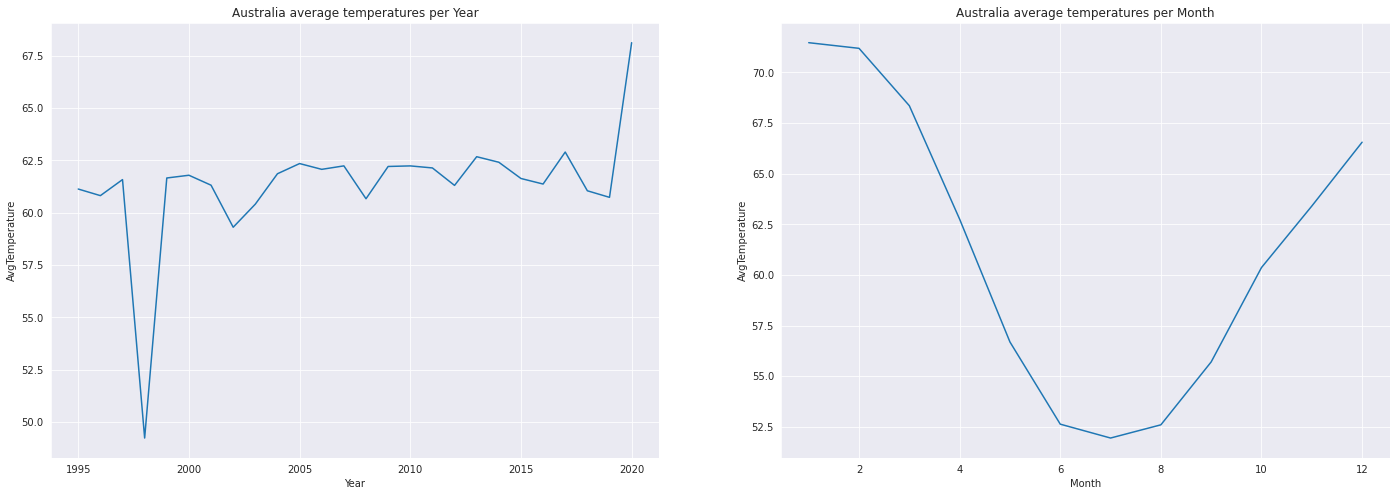

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(24,8))
ausie_by_year = ausie_df.groupby('Year')['AvgTemperature'].agg(np.mean)
ausie_by_month = ausie_df.groupby('Month')['AvgTemperature'].agg(np.mean)

ax[0].title.set_text('Australia average temperatures per Year')
ax[1].title.set_text('Australia average temperatures per Month')
sns.lineplot(data=ausie_by_year, ax=ax[0])
sns.lineplot(data=ausie_by_month, ax=ax[1])

In [ ]:
ausie_min_year = 'Suhu terendah di Australia pada tahun ' + ausie_by_year[ausie_by_year == ausie_by_year.min()].index[0].astype(str) + ' dengan suhu ' + np.round(ausie_by_year.min(), 2).astype(str) + ' C'
ausie_max_year = 'Suhu tertinggi di Australia pada tahun ' + ausie_by_year[ausie_by_year == ausie_by_year.max()].index[0].astype(str) + ' dengan suhu ' + np.round(ausie_by_year.max(), 2).astype(str) + ' C'
ausie_min_month = 'Suhu terendah di Australia pada bulan ' + ausie_by_month[ausie_by_month == ausie_by_month.min()].index[0].astype(str) + ' dengan suhu ' + np.round(ausie_by_month.min(), 2).astype(str) + ' C'
ausie_max_month = 'Suhu tertinggi di Australia pada bulan ' + ausie_by_month[ausie_by_month == ausie_by_month.max()].index[0].astype(str) + ' dengan suhu ' + np.round(ausie_by_month.max(), 2).astype(str) + ' C'

In [ ]:
print(ausie_min_year)
print(ausie_max_year)
print(ausie_min_month)
print(ausie_max_month)

Suhu terendah di Australia pada tahun 1998 dengan suhu 49.24 C
Suhu tertinggi di Australia pada tahun 2020 dengan suhu 68.11 C
Suhu terendah di Australia pada bulan 7 dengan suhu 51.95 C
Suhu tertinggi di Australia pada bulan 1 dengan suhu 71.47 C


##### Region Europe

Dapat disimpulkan bahwa suhu rata-rata di Europe per tahun mengalami kenaikan stabil hingga tahun 2014 sebelum mengalami penurunan. Lalu suhu rata-rata terus meningkat perbulang hingga puncaknya bulan 7 sebelum menurun dengan drastis

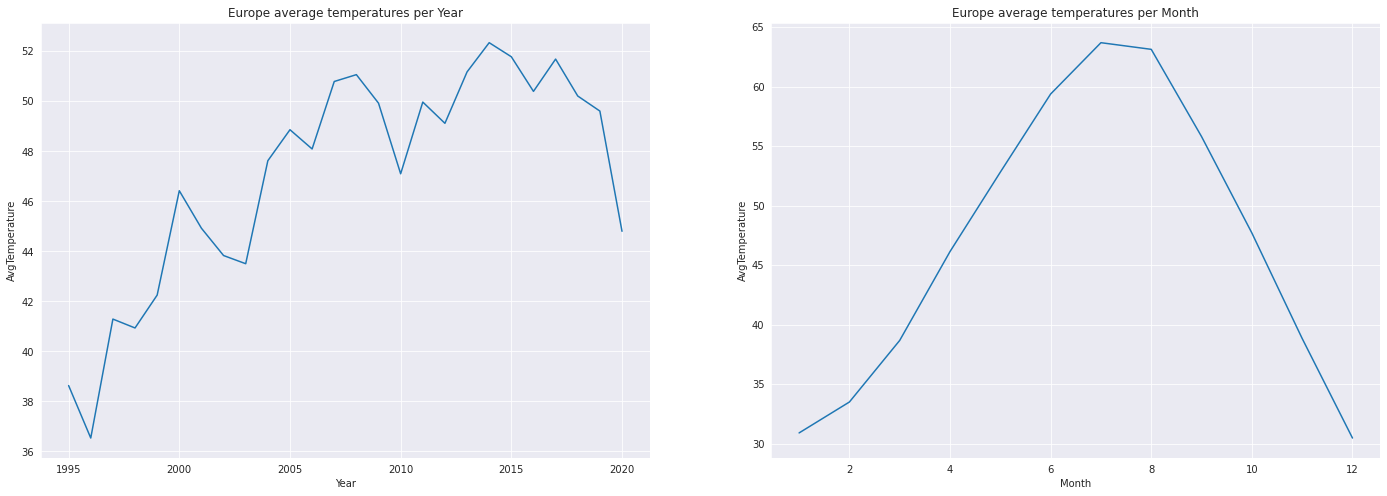

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(24,8))
europe_by_year = europe_df.groupby('Year')['AvgTemperature'].agg(np.mean)
europe_by_month = europe_df.groupby('Month')['AvgTemperature'].agg(np.mean)
europe_by_year = europe_by_year.iloc[2:]

ax[0].title.set_text('Europe average temperatures per Year')
ax[1].title.set_text('Europe average temperatures per Month')
sns.lineplot(data=europe_by_year, ax=ax[0])
sns.lineplot(data=europe_by_month, ax=ax[1])

In [ ]:
europe_min_year = 'Suhu terendah di Europe pada tahun ' + europe_by_year[europe_by_year == europe_by_year.min()].index[0].astype(str) + ' dengan suhu ' + np.round(europe_by_year.min(), 2).astype(str) + ' C'
europe_max_year = 'Suhu tertinggi di Europe pada tahun ' + europe_by_year[europe_by_year == europe_by_year.max()].index[0].astype(str) + ' dengan suhu ' + np.round(europe_by_year.max(), 2).astype(str) + ' C'
europe_min_month = 'Suhu terendah di Europe pada bulan ' + europe_by_month[europe_by_month == europe_by_month.min()].index[0].astype(str) + ' dengan suhu ' + np.round(europe_by_month.min(), 2).astype(str) + ' C'
europe_max_month = 'Suhu tertinggi di Europe pada bulan ' + europe_by_month[europe_by_month == europe_by_month.max()].index[0].astype(str) + ' dengan suhu ' + np.round(europe_by_month.max(), 2).astype(str) + ' C'

In [ ]:
print(europe_min_year)
print(europe_max_year)
print(europe_min_month)
print(europe_min_month)

Suhu terendah di Europe pada tahun 1996 dengan suhu 36.54 C
Suhu tertinggi di Europe pada tahun 2014 dengan suhu 52.34 C
Suhu terendah di Europe pada bulan 12 dengan suhu 30.48 C
Suhu terendah di Europe pada bulan 12 dengan suhu 30.48 C


##### Region Middle East

Dapat disimpulkan bahwa suhu rata-rata di Middle East per tahun mengalami kenaikan drastis pada tahun 2000 dan menurun drastis pada tahun 2019. Untuk per bulan suhu rata-rata mengalami kenaikan hingga bulan 8 lalu mengalami penurunan

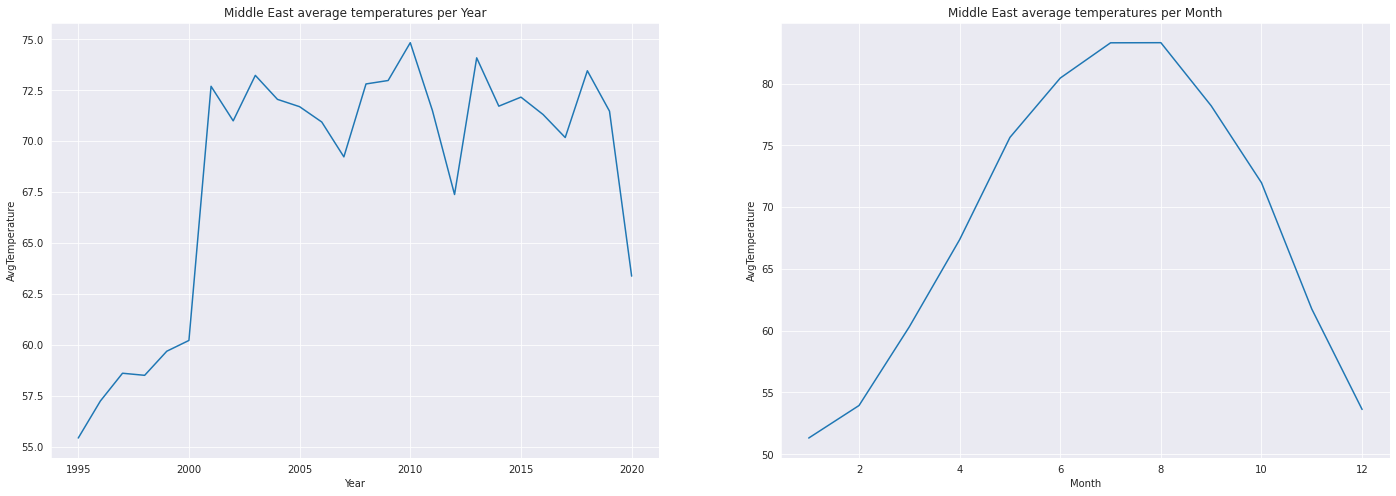

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(24,8))
middle_east_by_year = middle_east_df.groupby('Year')['AvgTemperature'].agg(np.mean)
middle_east_by_month = middle_east_df.groupby('Month')['AvgTemperature'].agg(np.mean)

ax[0].title.set_text('Middle East average temperatures per Year')
ax[1].title.set_text('Middle East average temperatures per Month')
sns.lineplot(data=middle_east_by_year, ax=ax[0])
sns.lineplot(data=middle_east_by_month, ax=ax[1])

In [ ]:
middle_east_min_year = 'Suhu terendah di Middle East pada tahun ' + middle_east_by_year[middle_east_by_year == middle_east_by_year.min()].index[0].astype(str) + ' dengan suhu ' + np.round(middle_east_by_year.min(), 2).astype(str) + ' C'
middle_east_max_year = 'Suhu tertinggi di Middle East pada tahun ' + middle_east_by_year[middle_east_by_year == middle_east_by_year.max()].index[0].astype(str) + ' dengan suhu ' + np.round(middle_east_by_year.max(), 2).astype(str) + ' C'
middle_east_min_month = 'Suhu terendah di Middle East pada bulan ' + middle_east_by_month[middle_east_by_month == middle_east_by_month.min()].index[0].astype(str) + ' dengan suhu ' + np.round(middle_east_by_month.min(), 2).astype(str) + ' C'
middle_east_max_month = 'Suhu tertinggi di Middle East pada bulan ' + middle_east_by_month[middle_east_by_month == middle_east_by_month.max()].index[0].astype(str) + ' dengan suhu ' + np.round(middle_east_by_month.max(), 2).astype(str) + ' C'

In [ ]:
print(middle_east_min_year)
print(middle_east_max_year)
print(middle_east_min_month)
print(middle_east_min_month)

Suhu terendah di Middle East pada tahun 1995 dengan suhu 55.42 C
Suhu tertinggi di Middle East pada tahun 2010 dengan suhu 74.84 C
Suhu terendah di Middle East pada bulan 1 dengan suhu 51.31 C
Suhu terendah di Middle East pada bulan 1 dengan suhu 51.31 C


##### Region North America

Dapat disimpulkan bahwa suhu rata-rata di North America per tahun mengalami kenaikan stabil dengan noise hingga tahun 2016 sebelum mengalami penurunan drastis. Untuk suhu rata-rata per bulan di North America mengalami kenaikan hingga bulan 7 sebelum mengalami penurunan

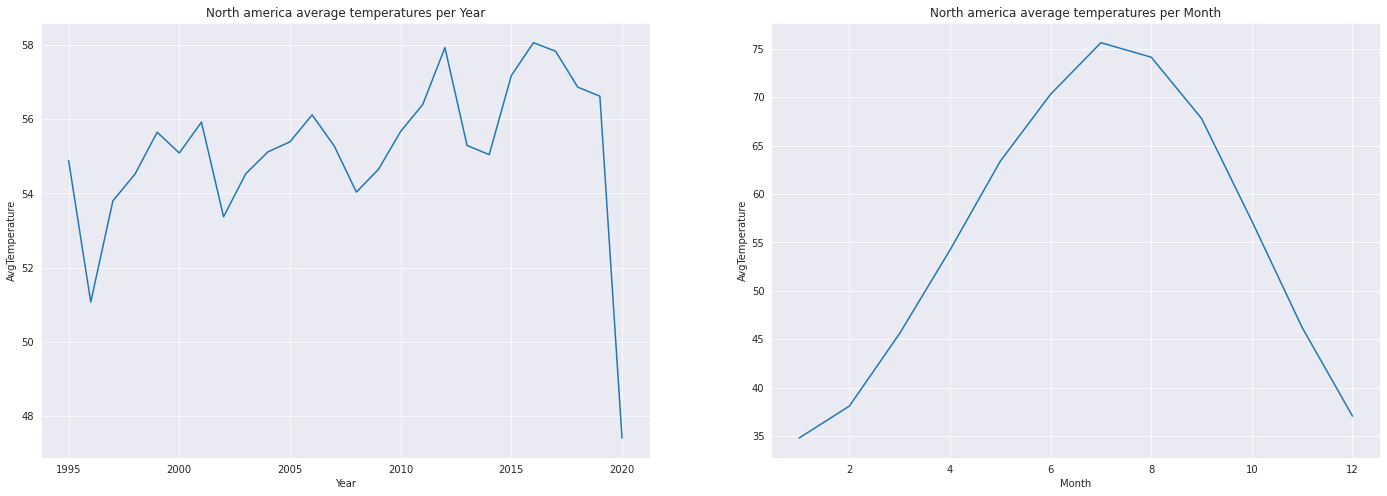

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(24,8))
north_america_by_year = north_america_df.groupby('Year')['AvgTemperature'].agg(np.mean)
north_america_by_month = north_america_df.groupby('Month')['AvgTemperature'].agg(np.mean)
north_america_by_year = north_america_by_year.iloc[1:]

ax[0].title.set_text('North america average temperatures per Year')
ax[1].title.set_text('North america average temperatures per Month')
sns.lineplot(data=north_america_by_year, ax=ax[0])
sns.lineplot(data=north_america_by_month, ax=ax[1])

In [ ]:
north_america_min_year = 'Suhu terendah di North America pada tahun ' + north_america_by_year[north_america_by_year == north_america_by_year.min()].index[0].astype(str) + ' dengan suhu ' + np.round(north_america_by_year.min(), 2).astype(str) + ' C'
north_america_max_year = 'Suhu tertinggi di North America pada tahun ' + north_america_by_year[north_america_by_year == north_america_by_year.max()].index[0].astype(str) + ' dengan suhu ' + np.round(north_america_by_year.max(), 2).astype(str) + ' C'
north_america_min_month = 'Suhu terendah di North America pada bulan ' + north_america_by_month[north_america_by_month == north_america_by_month.min()].index[0].astype(str) + ' dengan suhu ' + np.round(north_america_by_month.min(), 2).astype(str) + ' C'
north_america_max_month = 'Suhu tertinggi di North America pada bulan ' + north_america_by_month[north_america_by_month == north_america_by_month.max()].index[0].astype(str) + ' dengan suhu ' + np.round(north_america_by_month.max(), 2).astype(str) + ' C'

In [ ]:
print(north_america_min_year)
print(north_america_max_year)
print(north_america_min_month)
print(north_america_min_month)

Suhu terendah di North America pada tahun 2020 dengan suhu 47.41 C
Suhu tertinggi di North America pada tahun 2016 dengan suhu 58.06 C
Suhu terendah di North America pada bulan 1 dengan suhu 34.78 C
Suhu terendah di North America pada bulan 1 dengan suhu 34.78 C


##### Region South/Central America & Carribean

Dapat disimpulkan bahwa suhu rata-rata di Carribean per tahun mengalami kenaikan stabil hingga sekarang. Untuk per bulan suhu rata-rata mengalami penurunan hingga bulan 6 sebelum mengalami kenaikan

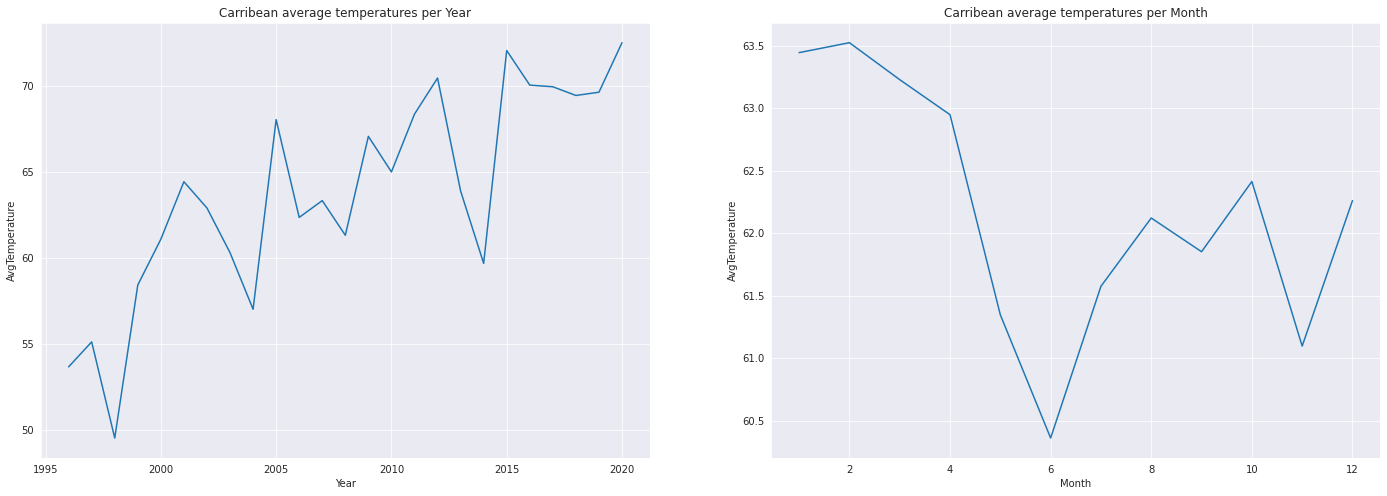

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(24,8))
carribean_by_year = carribean_df.groupby('Year')['AvgTemperature'].agg(np.mean)
carribean_by_month = carribean_df.groupby('Month')['AvgTemperature'].agg(np.mean)
carribean_by_year = carribean_by_year.iloc[1:]

ax[0].title.set_text('Carribean average temperatures per Year')
ax[1].title.set_text('Carribean average temperatures per Month')
sns.lineplot(data=carribean_by_year, ax=ax[0])
sns.lineplot(data=carribean_by_month, ax=ax[1])

In [ ]:
carribean_min_year = 'Suhu terendah di Carribean pada tahun ' + carribean_by_year[carribean_by_year == carribean_by_year.min()].index[0].astype(str) + ' dengan suhu ' + np.round(carribean_by_year.min(), 2).astype(str) + ' C'
carribean_max_year = 'Suhu tertinggi di Carribean pada tahun ' + carribean_by_year[carribean_by_year == carribean_by_year.max()].index[0].astype(str) + ' dengan suhu ' + np.round(carribean_by_year.max(), 2).astype(str) + ' C'
carribean_min_month = 'Suhu terendah di Carribean pada bulan ' + carribean_by_month[carribean_by_month == carribean_by_month.min()].index[0].astype(str) + ' dengan suhu ' + np.round(carribean_by_month.min(), 2).astype(str) + ' C'
carribean_max_month = 'Suhu tertinggi di Carribean pada bulan ' + carribean_by_month[carribean_by_month == carribean_by_month.max()].index[0].astype(str) + ' dengan suhu ' + np.round(carribean_by_month.max(), 2).astype(str) + ' C'

In [ ]:
print(carribean_min_year)
print(carribean_max_year)
print(carribean_min_month)
print(carribean_min_month)

Suhu terendah di Carribean pada tahun 1998 dengan suhu 49.53 C
Suhu tertinggi di Carribean pada tahun 2020 dengan suhu 72.52 C
Suhu terendah di Carribean pada bulan 6 dengan suhu 60.36 C
Suhu terendah di Carribean pada bulan 6 dengan suhu 60.36 C


# Data Preprocecssing

Karena kita tinggal di region Asia, maka kita hanya perlu region Asia saja

In [ ]:
new_asia_df = new_df[new_df['Region'] == 'Asia']
new_asia_df.head()

,Region,Month,Day,Year,AvgTemperature,Date
251118,Asia,1,1,1995,64.8,1-1-1995
251119,Asia,1,2,1995,58.4,2-1-1995
251120,Asia,1,3,1995,-99.0,3-1-1995
251121,Asia,1,4,1995,59.6,4-1-1995
251122,Asia,1,5,1995,64.9,5-1-1995


In [ ]:
col_to_drop = ['Region', 'Month', 'Year', 'Day']
new_asia_df = new_asia_df.drop(col_to_drop, axis=1)
new_asia_df.head()

,AvgTemperature,Date
251118,64.8,1-1-1995
251119,58.4,2-1-1995
251120,-99.0,3-1-1995
251121,59.6,4-1-1995
251122,64.9,5-1-1995


In [ ]:
print(f'The dataframe has {new_asia_df.shape[0]} recods and {df.shape[1]} columns')

The dataframe has 316663 recods and 8 columns


Mencari outlier pada data

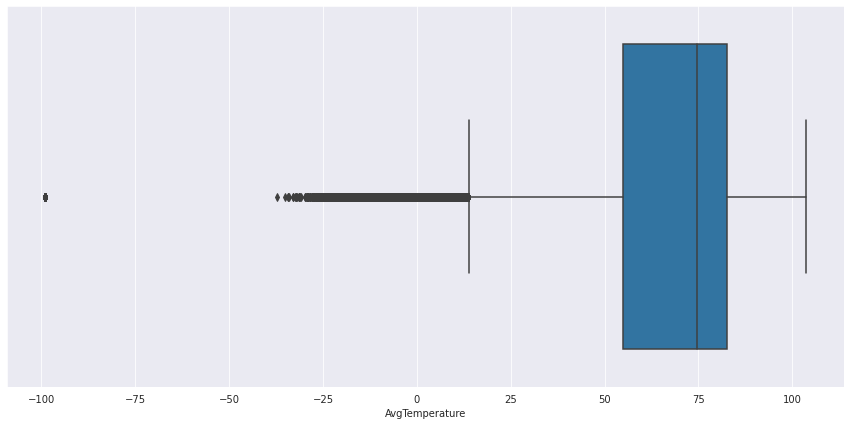

In [ ]:
plt.figure(figsize=(15,7))
sns.boxplot(x='AvgTemperature', data=new_asia_df)

Bisa kita lihat terdapat banyak outlier, hal ini dapat kita hilangkan menggunakan IQR Method

In [ ]:
Q1 = new_asia_df.quantile(.25)
Q3 = new_asia_df.quantile(.75)
IQR = Q3 - Q1
bot = Q1 - 1.5 * IQR
top = Q3 + 1.5 * IQR
new_asia_df = new_asia_df[~((new_asia_df < bot) | (new_asia_df > top)).any(axis=1)]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  


In [ ]:
print(f'The dataframe has {new_asia_df.shape[0]} recods and {df.shape[1]} columns')

The dataframe has 300985 recods and 8 columns


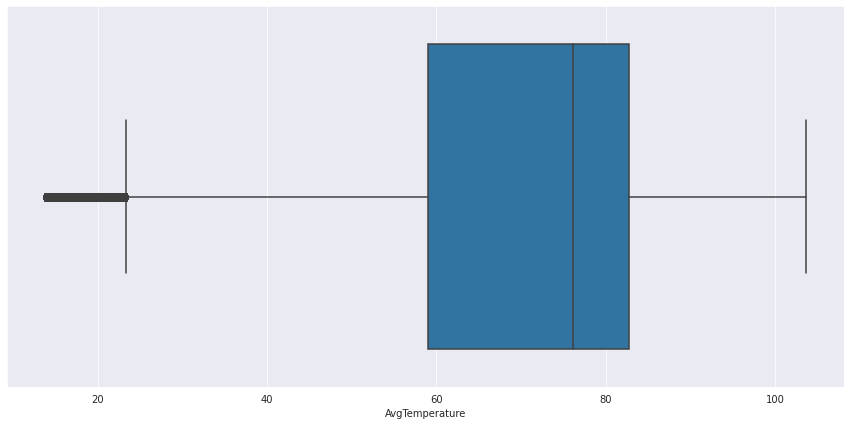

In [ ]:
plt.figure(figsize=(15,7))
sns.boxplot(x='AvgTemperature', data=new_asia_df)

Setelah melakukan IQR Method untuk menghilangkan outlier, dapat kita lihat masih ada data yang menjadi outlier. Hal itu bisa kita hilangkan juga dengan melakukan normalisasi data. Pertama kita lihat distribusi data apakah data termasuk dalam distribusi normal atau tidak

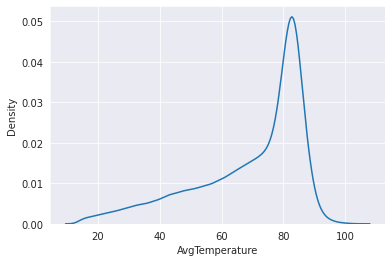

In [ ]:
sns.kdeplot(x='AvgTemperature', data=new_asia_df)

Bisa kita lihat data tidak terdistribusi dengan normal karena data agak ke skew ke kanan dan mempunya ekor sangat panjang di kiri, sehingga kita perlu menormalisasi data. Kita dapat menormalisasi data menggunakan library MinMaxScaler

In [ ]:
from sklearn.preprocessing import MinMaxScaler

normalizer = MinMaxScaler()
new_asia_df['NormalizedTemp'] = normalizer.fit_transform(new_asia_df['AvgTemperature'].values.reshape(-1,1))
new_asia_df.head()

,AvgTemperature,Date,NormalizedTemp
251118,64.8,1-1-1995,0.567297
251119,58.4,2-1-1995,0.496107
251121,59.6,4-1-1995,0.509455
251122,64.9,5-1-1995,0.568409
251124,71.9,7-1-1995,0.646274


Setelah melakukan normalisasi, maka kita akan melihat distribusinya lagi untuk melihat perubahan

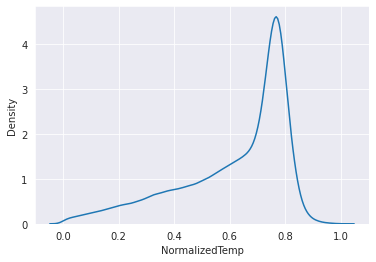

In [ ]:
sns.kdeplot(x='NormalizedTemp', data=new_asia_df)

Bisa kita lihat, data yang telah dinormalisasi akan mengalami perubahan jarak pada skala dari 0 ke 1. Hal ini akan mempermudah model memproses data ini. Lalu kita akan membuat function yang akan membuat dataset dapat diterima model

In [ ]:
import tensorflow as tf

def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
  series = tf.expand_dims(series, axis=-1)
  ds = tf.data.Dataset.from_tensor_slices(series)
  ds = ds.window(window_size + 1, shift=1, drop_remainder=True)
  ds = ds.flat_map(lambda w: w.batch(window_size + 1))
  ds = ds.shuffle(shuffle_buffer)
  ds = ds.map(lambda w: (w[:-1], w[-1:]))
  return ds.batch(batch_size).prefetch(1)

In [ ]:
temp = new_asia_df['NormalizedTemp'].values
temp

array([0.567297  , 0.49610679, 0.50945495, ..., 0.78642937, 0.74638487,
       0.76307008])

Lalu kita lakukan splitting dataset menjadi train dan validation dengan ration 80:20

In [ ]:
from sklearn.model_selection import train_test_split

temp_train, temp_valid = train_test_split(temp, test_size=.2, random_state=0)

In [ ]:
print('Total temp train:', len(temp_train))
print('Total temp valid:', len(temp_valid))

Total temp train: 240788
Total temp valid: 60197


Lalu kita panggil function yang kita sudah buat untuk mengubah dataset menjadi data yang dapat diterima oleh model

In [ ]:
window_size = 60
batch_size = 512
shuffle_buffer = 1000

In [ ]:
train_set = windowed_dataset(temp_train, window_size=window_size, batch_size=batch_size, shuffle_buffer=shuffle_buffer)
valid_set = windowed_dataset(temp_valid, window_size=window_size, batch_size=batch_size, shuffle_buffer=shuffle_buffer)

In [ ]:
train_set

<PrefetchDataset element_spec=(TensorSpec(shape=(None, None, 1), dtype=tf.float64, name=None), TensorSpec(shape=(None, None, 1), dtype=tf.float64, name=None))>

# Modeling

In [ ]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense

model = Sequential([
    LSTM(16, input_shape=[None, 1], return_sequences=True),
    LSTM(32),
    Dense(256, activation='relu'),
    Dense(1)
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, None, 16)          1152      
                                                                 
 lstm_1 (LSTM)               (None, 32)                6272      
                                                                 
 dense (Dense)               (None, 256)               8448      
                                                                 
 dense_1 (Dense)             (None, 1)                 257       
                                                                 
Total params: 16,129
Trainable params: 16,129
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from tensorflow.keras.losses import Huber
from tensorflow.keras.optimizers import SGD

loss = Huber()
optimizer = SGD(learning_rate=1e-3)

model.compile(loss=loss, optimizer=optimizer, metrics=['mae'])

Membuat custom callback turunan dari class Callback tensorflow agar saat model sudah mencapai mae yang diingkan maka model akan stop training

In [ ]:
from keras.callbacks import Callback

threshold = new_asia_df.shape[0] * 1e-3
class Callback(Callback):
  def on_epoch_end(self, epoch, logs={}):
    if logs.get('mae') < threshold and logs.get('val_mae') < threshold:
      print('\nStopping training. Model has reached the mae threshold')
      self.model.stop_training = True

In [ ]:
history = model.fit(
    train_set,
    epochs=1000,
    validation_data=valid_set,
    callbacks=[Callback()]
)

Epoch 1/1000
    471/Unknown - 35s 64ms/step - loss: 0.1103 - mae: 0.4242
Stopping training. Model has reached the mae threshold
471/471 [==============================] - 42s 80ms/step - loss: 0.1103 - mae: 0.4242 - val_loss: 0.0493 - val_mae: 0.2838


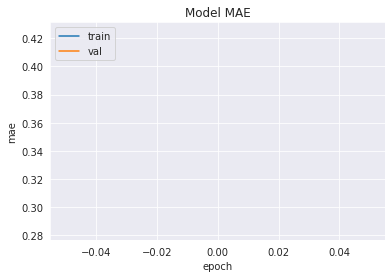

In [ ]:
plt.plot(history.history['mae'])
plt.plot(history.history['val_mae'])
plt.title('Model MAE')
plt.ylabel('mae')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

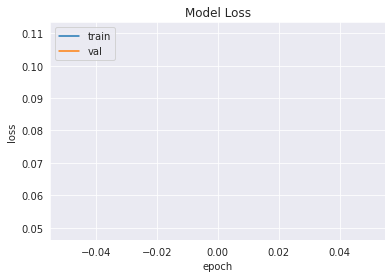

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()